# EDA

In [3]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set_style('darkgrid')


In [5]:
AIR_VISIT_DATA = pd.read_csv('air_visit_data.csv')
AIR_STORE_INFO = pd.read_csv('air_store_info.csv')
AIR_RESERVE = pd.read_csv('air_reserve.csv')
STORE_ID_RELATION = pd.read_csv('store_id_relation.csv')
DATE_INFO = pd.read_csv('date_info.csv').rename(columns={'calendar_date': 'visit_date'})

### Individual Feature Visualizations

**1. Number of visits**

Total number of visitors per day over the time series. Bar graphs show median visitors per day of the week and month of the year.

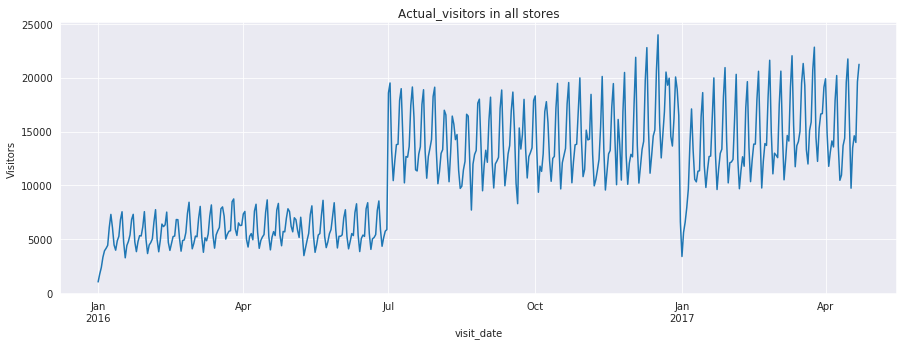

In [34]:
# a = AIR_VISIT_DATA.groupby(AIR_VISIT_DATA['visit_date'])['visitors'].sum()
# plt.figure(figsize=(15,7))
# plt.plot(a.index, a)

# plt.ylabel("Number of Visitors",fontsize= 20)
# plt.legend()


# AIR_VISIT_DATA['visit_date'] = pd.to_datetime(AIR_VISIT_DATA['visit_date'])
# AIR_VISIT_DATA['day_of_week'] = AIR_VISIT_DATA['visit_date'].dt.dayofweek
# b = AIR_VISIT_DATA.groupby(['day_of_week'])['visitors'].median()


plt.rcParams['figure.figsize'] = 15, 5
air_agg_actual = AIR_VISIT_DATA.groupby(['visit_date'])['visitors'].sum()
vis_data = pd.DataFrame(air_agg_actual)
vis_data['visitors'].plot(label = 'Visitor reservation trend')
plt.ylabel('Visitors')
plt.title('Actual_visitors in all stores')


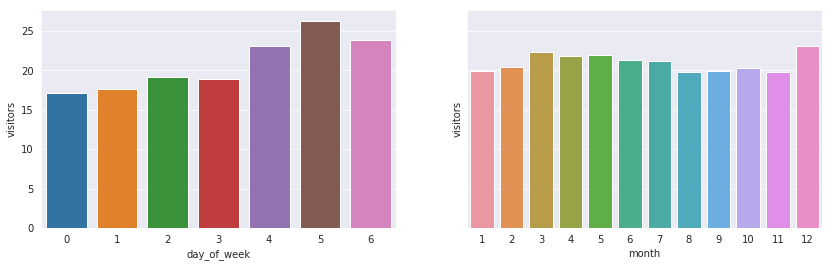

In [36]:
AIR_VISIT_DATA['visit_date'] = pd.to_datetime(AIR_VISIT_DATA['visit_date'])
AIR_VISIT_DATA['day_of_week'] = AIR_VISIT_DATA['visit_date'].dt.dayofweek
b = AIR_VISIT_DATA.groupby(['day_of_week'])['visitors'].mean()

AIR_VISIT_DATA['month'] = AIR_VISIT_DATA['visit_date'].dt.month
c = AIR_VISIT_DATA.groupby(['month'])['visitors'].mean()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(14,4))
sns.barplot(x=b.index, y=b, ax=ax1)
sns.barplot(x=c.index, y=c, ax=ax2)



As seen above, the weekend appear to be the busiest days, whereas Sunday and Monday have the least amount of visitors. 

From a monthly level, December appears to be the most popular month and March through May stay consistently busy.
March is the Cherry blossom season and April has Golden week in Japan

**2. Reservations**

We want to see how our reservations data compares to the actual visitor numbers - reservations for each day and the hour of these visits. 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


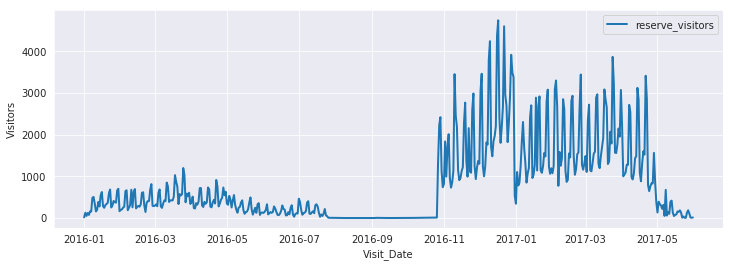

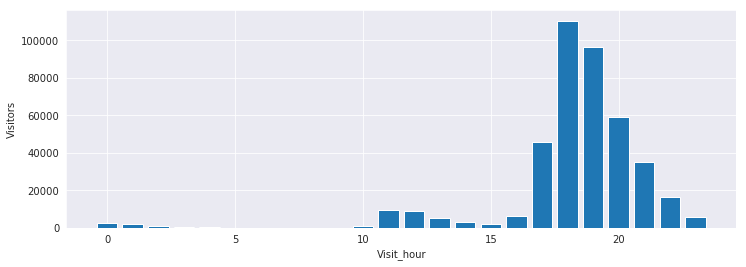

In [7]:
#convert into datetime 
AIR_RESERVE['visit_datetime'] = pd.to_datetime(AIR_RESERVE['visit_datetime'])
AIR_RESERVE['reserve_datetime'] = pd.to_datetime(AIR_RESERVE['reserve_datetime'])
AIR_RESERVE['visit_hour'] = AIR_RESERVE['visit_datetime'].dt.hour
AIR_RESERVE['visit_date'] = AIR_RESERVE['visit_datetime'].dt.date

#plot visitors with reservations
air_reserve_date = AIR_RESERVE.groupby(['visit_date'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.plot(air_reserve_date.index,air_reserve_date,lw = 2)
plt.xlabel("Visit_Date")
plt.ylabel("Visitors")
plt.legend()

#plot visitors by hours and see the evening is most popular
air_reserve_hour = AIR_RESERVE.groupby(['visit_hour'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.bar(air_reserve_hour.index,air_reserve_hour)
plt.xlabel("Visit_hour")
plt.ylabel("Visitors")
plt.legend()

Few reservations in 2016; some have none for a long period of time. Volume increase significantly at the end of 2016 - possibly the AIR system started tracking a lot of new restaurants. In 2017, number of reservations stayed relativley high and consistent. In addition, most reservations are in the evening (dinner time). 

**3. Store cuisine & area**

Here, we are plotting the numbers of different types of cuisine (or air_genre_names) with the area associated with the restaurant.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


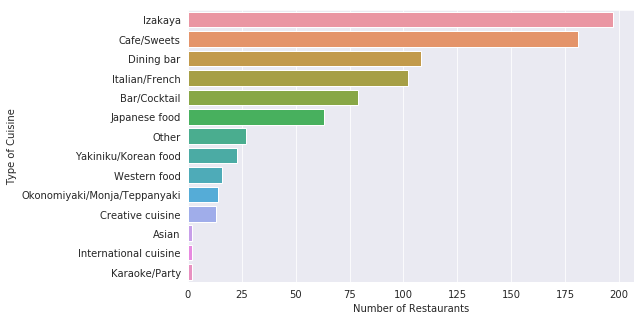

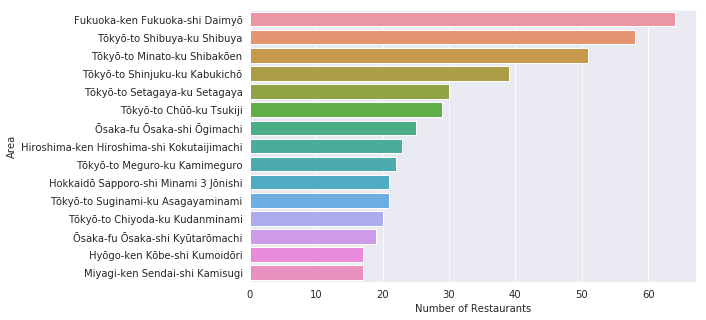

In [8]:
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000

air_store_genre = AIR_STORE_INFO.groupby(AIR_STORE_INFO['air_genre_name'])['air_store_id'].count().reset_index()
air_store_genre = air_store_genre.sort_values(['air_store_id'],ascending=False)

#number of  restaurants by type of cuisine
plt.figure(figsize=(8,5))
sns.barplot(x='air_store_id', y='air_genre_name', data = air_store_genre)
plt.xlabel("Number of Restaurants")
plt.ylabel("Type of Cuisine")
plt.legend()


air_area = AIR_STORE_INFO.groupby(AIR_STORE_INFO['air_area_name'])['air_store_id'].count().reset_index()
air_area = air_area.sort_values(['air_store_id'],ascending=False)
air_area = air_area.head(15)

#number of restaurants by area
plt.figure(figsize=(8,5))
sns.barplot(x = 'air_store_id',y = air_area['air_area_name'],data = air_area)
plt.xlabel("Number of Restaurants")
plt.ylabel("Area")
plt.legend()

There seems to be a lot of 'Izakaya' restaurants, followed by Cafe’s. There's not a lot of Karaoke/Party places in our dataset, and surprisingly only a few desribe themselves generically as 'International' or 'Asian'. 

Fukuoka has the largest number of air restaurants per area, followed by many districts in Tokyo (which would make sense since Tokyo is Japan's capital).

Apparently Japan's terittory is divided in 8 regions which are not official administrative units, but have been traditionally used as the regional division of Japan in a number of contexts [https://en.wikipedia.org/wiki/List_of_regions_of_Japan]
Kantō region (eastern Honshū, population: 42,607,376, largest city: Tokyo)
Kyūshū (island, population: 14,596,977, largest city: Fukuoka) which includes:
Northern Kyushu: Fukuoka, Saga, Nagasaki and Ōita (largest city: Fukuoka)
Southern Kyushu: Kumamoto, Miyazaki and Kagoshima (largest city: Kagoshima)

### Relating Features Together

**1. Visitors per cuisine**

Average number of restaurant visitors by type of cuisine (air_genre_name). 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a9f403f98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f0a9f414be0>], dtype=object)

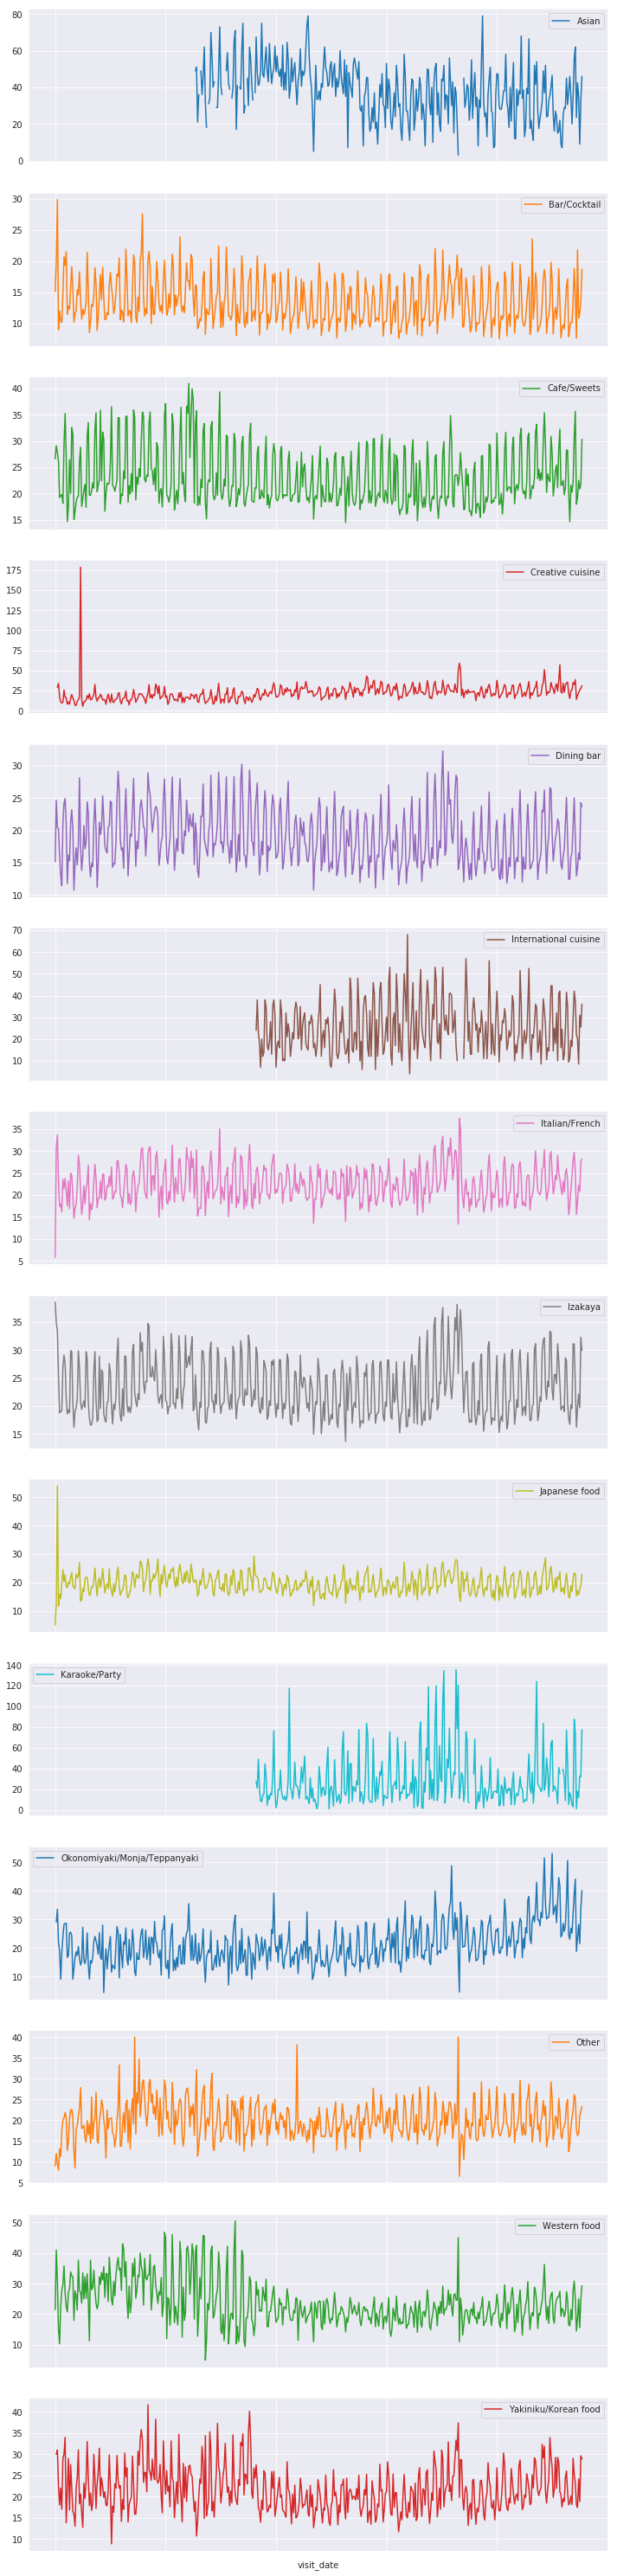

In [9]:
#show visitors by type of cuisine

ab = pd.merge(AIR_VISIT_DATA,AIR_STORE_INFO,on='air_store_id')
ab1 = ab.groupby(['visit_date','air_genre_name'])['visitors'].mean().reset_index()
ab13 = ab1.pivot_table(values='visitors',index='visit_date',columns='air_genre_name')
ab13.plot(subplots=True,figsize=(12,60))

# Restaurant Visitor Forecasting

In [10]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read the data

Number of stores with reservations = number of reservations ( because there's one reservation per store.
    For this reason the mean is IMO a good normalized measure of visits, mean = # visits / # reserved stores

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime
import calendar

#read in data from air
air = pd.read_csv('air_visit_data.csv', parse_dates=[1])
air.set_index(['visit_date'], inplace=True)
air.index.name=None
air.drop('air_store_id',axis=1,inplace=True)
df2=pd.DataFrame()
df2['visit_total'] = air.groupby(air.index,squeeze=True,sort=True)['visitors'].sum()
df2['visit_mean'] = air.groupby(air.index,squeeze=True,sort=True)['visitors'].mean()
df2['reserv_cnt'] = air.groupby(air.index,squeeze=True,sort=True)['visitors'].count()
air=df2;del df2

#date info with day of the week and holidays
hol=pd.read_csv('date_info.csv', parse_dates=True).rename(columns={'calendar_date':'visit_date'})
hol['visit_date'] = pd.to_datetime(hol['visit_date'])
hol.set_index(['visit_date'], inplace=True)
hol.index.name=None
hol.day_of_week = hol.day_of_week.apply(list(calendar.day_name).index)

#### Seasonal decomposition using moving averages

There are 3 major peaks in the data: 

* Mid-March 2016 (again in 2017)
* April 2016
* Right before NYE 2016  

When looking at the date_info data, we see some flagged holidays, but they do not seem to have a strong presence in our data excpet for 'Golden Week' in Japan (hence the peak in April). March could be related to the vernal equinox or peak of cherry blossom season (peak tourists/visitors?). And of course during the holidays. 

Again, there is hte least number of visits on Monday and most reservations are during the weekend. 

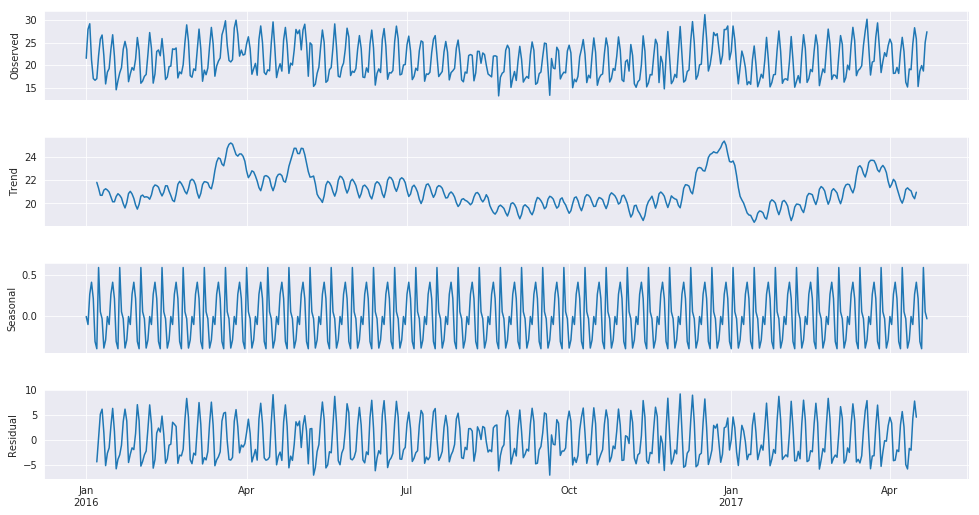

In [15]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(air.visit_mean, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [16]:
df2=air.join(hol)
df2[df2.holiday_flg==0].groupby(hol.day_of_week,squeeze=True,sort=True)['visit_mean'].sum()
#df2.day_of_week=df3.day_of_week.apply(lambda x: list(calendar.day_name)[x]) # equiv to air.sum(0)

day_of_week
0     990.358277
1    1166.228003
2    1265.651637
3    1162.836395
4    1503.191793
5    1731.514759
6    1534.474447
Name: visit_mean, dtype: float64

### Pre-ARIMA: making the time series stationary

A stationary time series means that variance and autocorrelation structure not changing over time. Changes in the mean happen when the series has a overall trend. 

First, create a new series y with the first difference y=x$_t$-x<sub>t-1</sub> and take seasonal differences. Then, take the log of the series to compress oscillations.  

ADF tests can help us decide if a time series is stationary. The null hypothesis  = non-stationary. We want a p-value < 0.05 to reject the null hypothesis. 

The original time series (mean of visits) already has a p-value of 0.003, but applying a seasonal differentiation improves the test results (p-value ~ 0). A weekly seasonality is clearly visible in the EDA above, so that's why we're taking the seasonal difference. Taking the log helps, but not that much, so variance is already stable. Applying 1st or seasonal differentiation improves the results. For the model, we're going to be using the serasonal series with no 1st difference.

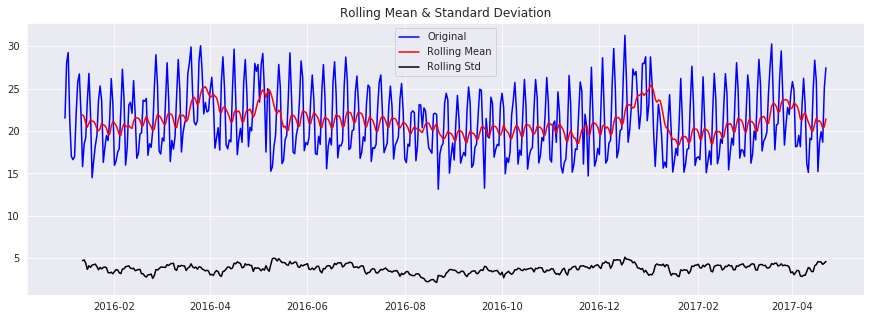

Results of Dickey-Fuller Test:
Test Statistic                  -3.796104
p-value                          0.002947
#Lags Used                      16.000000
Number of Observations Used    461.000000
Critical Value (1%)             -3.444615
Critical Value (5%)             -2.867830
Critical Value (10%)            -2.570120
dtype: float64


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


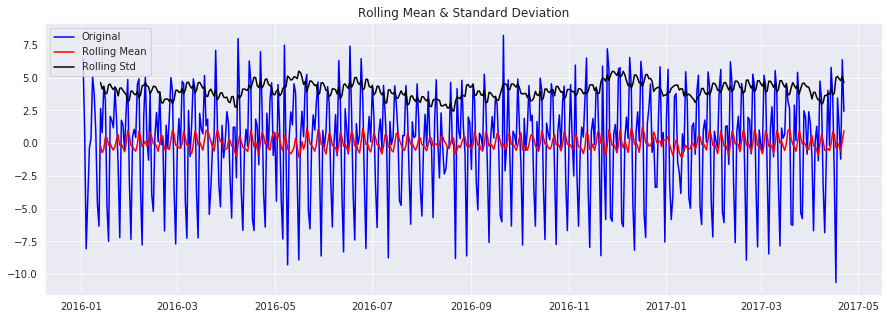

Results of Dickey-Fuller Test:
Test Statistic                -6.608968e+00
p-value                        6.448883e-09
#Lags Used                     1.800000e+01
Number of Observations Used    4.580000e+02
Critical Value (1%)           -3.444709e+00
Critical Value (5%)           -2.867871e+00
Critical Value (10%)          -2.570142e+00
dtype: float64


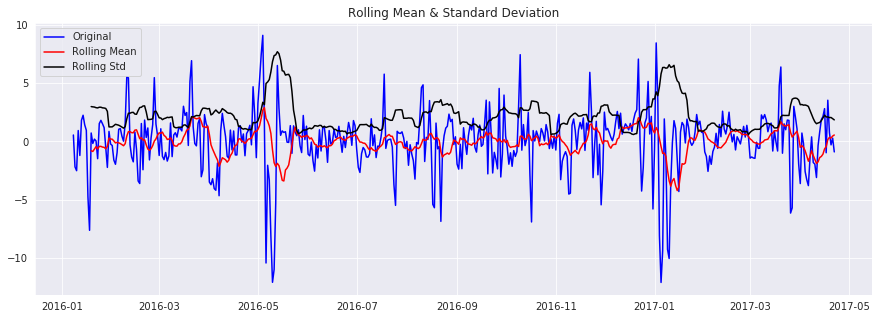

Results of Dickey-Fuller Test:
Test Statistic                -7.196314e+00
p-value                        2.429479e-10
#Lags Used                     1.500000e+01
Number of Observations Used    4.550000e+02
Critical Value (1%)           -3.444804e+00
Critical Value (5%)           -2.867913e+00
Critical Value (10%)          -2.570165e+00
dtype: float64


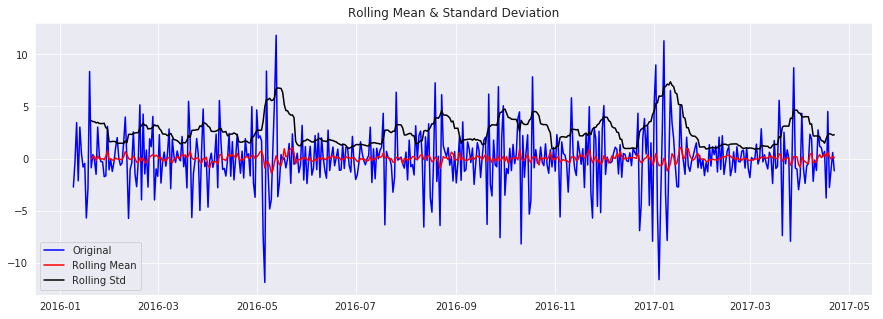

Results of Dickey-Fuller Test:
Test Statistic                -9.427797e+00
p-value                        5.288819e-16
#Lags Used                     1.600000e+01
Number of Observations Used    4.530000e+02
Critical Value (1%)           -3.444868e+00
Critical Value (5%)           -2.867941e+00
Critical Value (10%)          -2.570180e+00
dtype: float64


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean();
    rolstd = timeseries.rolling(window=12,center=False).std();

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(air.visit_mean); 

# Log (only minor improvement, variance is relatively stable)
air.visit_mean_log= air.visit_mean.apply(lambda x: np.log(x))  

# 1st difference (improvement), what we'll be using
air['visit_mean_diff'] = air.visit_mean - air.visit_mean.shift(1)  
test_stationarity(air.visit_mean_diff.dropna(inplace=False)) #-6.608968e+00

# Seasonal difference: take a weekly season improves stationarity even more
air['visit_mean_seasonal'] = air.visit_mean - air.visit_mean.shift(7)
test_stationarity(air.visit_mean_seasonal.dropna(inplace=False)) #-7.196314e+00

# Seasonal and 1st difference is even better (but already performing well)
air['visit_mean_seasonal_diff'] = air.visit_mean_diff - air.visit_mean_diff.shift(7)
test_stationarity(air.visit_mean_seasonal_diff.dropna(inplace=False)) #-9.427797e+00

Run autocorrelation ACF and partial autocorrelation PACF to find the details of the ARIMA(p,d,q)(P,D,Q) model. 

ACF on the mean visits has a repeated pattern (7-day seasonal term) 
= **seasonal\_order=( , 1, ,7)**
+ **order=( , 0, )** (no first difference) 
+ **trend='c'** a constant term for the non-zero mean value

ACF and PACF of the visit mean:


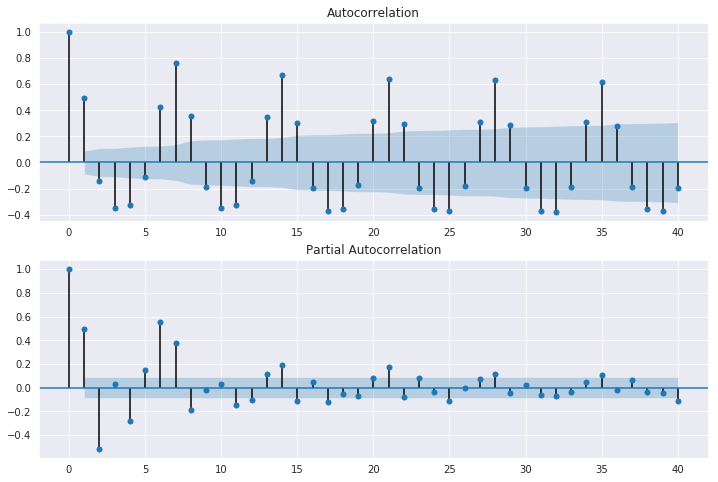

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(air.visit_mean, lags=40, alpha=.05, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(air.visit_mean, lags=40, alpha=.05, ax=ax2)
print("ACF and PACF of the visit mean:")

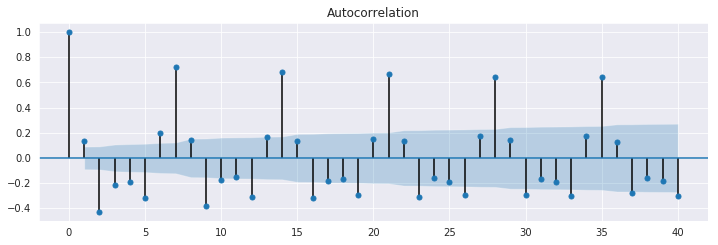

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(air.visit_mean_diff[1:], lags=40, alpha=.05, ax=ax1)

ACF and PACF below plot the seasonal difference data

PACF: positive at lag=1 (the series appears slightly "underdifferenced"), so we'll add another AR term to the model (p) = **order=(2, , )** (term at lag=2 cuts off, is not significant at the 95% confidence interval)

ACF: overdifferentiated at lag = 1 and cuts off at lag=2, so we'll add another MA term to our model (q) = **order=( , , 2)**. Negative at lag = 7, so we'll add a seasonal MA term (P) = **seasonal\_order=(0, , 1, )**

ACF and PACF of the 7-day differenced visit mean:


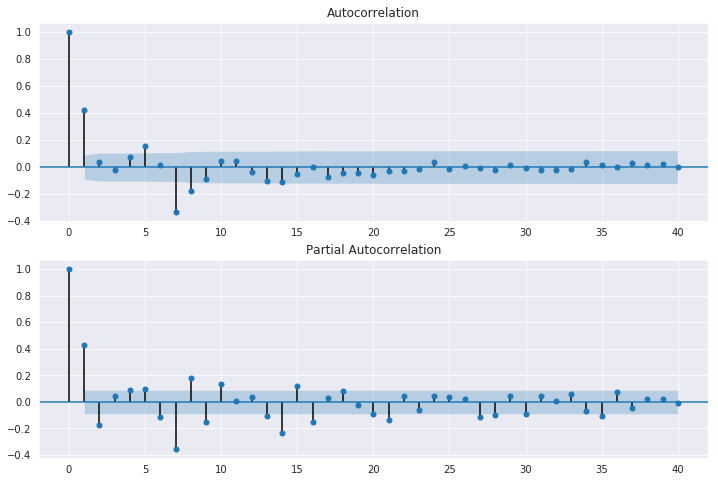

In [20]:
print("ACF and PACF of the 7-day differenced visit mean:")
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(air.visit_mean_seasonal[8:], lags=40, alpha=.05, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(air.visit_mean_seasonal[8:], lags=40, alpha=.05, ax=ax2)

### SARIMA model 
Seasonal Auto Regressive Integrated Moving Average 

In [21]:
from sklearn.metrics import mean_squared_error
def mean_squared_log_error(y_pred, y_true, **dict):
    '''Assume y_true starts earlier than y_pred, y_true is NaN free, and NaN in y_pred are only in the beginning'''
    indafterNaN = y_pred.first_valid_index()
    if (y_true.index[0] > y_pred.index[0]): return "Check indices of prediction and true value"
    ind1stcommon = y_true.index[y_true.index==y_pred.index[0]]
    indstart = max(indafterNaN, ind1stcommon)
    indend = y_true.index[-1]
    return mean_squared_error(np.log(y_true[indstart:indend]+1), 
                              np.log(y_pred[indstart:indend]+1) )**0.5

def plotSARIMAX(labels, pred):
    fig = plt.figure(figsize=(12, 8))
    layout = (2, 2)
    ax1 = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax3 = plt.subplot2grid(layout, (1, 0))
    ax4 = plt.subplot2grid(layout, (1, 1))
    labels.plot(ax=ax1);
    pred.plot(ax=ax1, title='MSE: %.4f'% mean_squared_log_error(pred, labels))
    ax3 = sm.graphics.tsa.plot_acf(results.resid, lags=40, alpha=.05, ax=ax3, title="ACF of residuals")
    ax4 = sm.graphics.tsa.plot_pacf(results.resid, lags=40, alpha=.05, ax=ax4, title="PACF of residuals")
    plt.tight_layout()
    print("ACF and PACF of residuals")

In [22]:
from scipy.optimize import brute
from sklearn.metrics import mean_squared_error

def autoSARIMAX(endog, exog=None, date_train_end=None, pred_days=[-12,12], verbose=True,\
        ranges=(slice(1,3),slice(0,1),slice(1,3),  slice(0,2),slice(1,2),slice(1,2),slice(7,8))):
    #Instantiate the grid with parameters and scores
    global grid
    grid = []
    #Get indices up to which you do train and prediction 
    if date_train_end is None:
        ind_train = endog.index[-1]
    else:
        ind_train = np.where(endog.index==date_train_end)[0][0]
    #optimization
    resultsbrute = brute(runSARIMAX, ranges=ranges, args=(endog,exog,(ind_train,pred_days),), full_output=True, finish=None)
    del grid[0]
    #Print/Plot results
    if verbose:
        print("Best parameters: {}".format([int(p) for p in resultsbrute[0]]))
        print("Best score:          {}".format(resultsbrute[1]))
        gr = plotautoSARIMAX(resultsbrute, verbose)
    return resultsbrute, gr

def plotautoSARIMAX(resultsbrute, verbose=True):
    #Print/Plot results
    if not verbose: return None
    #Plot scores by parameter values
    gr = pd.DataFrame({'params':[''.join(str(n) for n in g[0]) for g in grid], 'score': [row[1] for row in grid], 'aic': [row[2] for row in grid]})
    print("All parameters and scores: \n")
    print(gr.head(1000).to_string())
    ax1 = gr.plot('params','score',rot=90, grid=True, figsize=(15,4))
    ax2 = gr.plot('params','aic',rot=90, secondary_y=True,ax=ax1)
    ax1.set_ylabel('Score');ax2.set_ylabel('AIC');
    plt.xticks(range(len(gr)), gr.params, rotation=90);
    return gr

def runSARIMAX(coeffs, *args):
    endog = args[0]
    exog = args[1]
    #Process the row indices for training and prediction
    ind_train = args[2][0]
    pred_days = args[2][1]
    ind_pred = [len(endog)+pred_days[0], len(endog)+pred_days[1]]
    if ind_pred[0] > ind_train: 
        raise ValueError('Make sure prediction bounds begin at least at len(endog): pred_days[0] must be <= %i ' % (ind_train-len(endog)))
    exog_train, exog_pred, start_params = None, None, list()
    if exog is not None:
        if ind_pred[1] > len(exog):
            raise ValueError('Make sure prediction bounds end  <= len(exog): pred_days[1] must be <= %i ' % (len(exog)-len(endog)))
        exog_train = exog[:ind_train]
        exog_cols = 1 if len(exog.shape) == 1 else exog.shape[1]
        start_params.extend(0.1*np.ones(exog_cols-1))
        exog_pred = exog[ind_pred[0]-1:ind_pred[1]]
        exog_pred = pd.DataFrame(exog_pred)
        
    #Get the hyperparameters
    order = coeffs[0:3].tolist()
    seasonal_order = coeffs[3:7].tolist()
    trend = 'c' if (order[1]==0) else 'n'
    #Train SARIMAX and fit it on data, predict to get scores
    try:        
        mod = sm.tsa.statespace.SARIMAX(endog[:ind_train], exog_train, \
                                        trend=trend, order=order, seasonal_order=seasonal_order)
        start_params.extend(0.1*np.ones( len(mod.params_complete)))
        fit = mod.fit(start_params=start_params)
        pred = fit.predict(start=ind_pred[0], end=ind_pred[1], exog=exog_pred)
        aic = fit.aic
        score = mean_squared_log_error(pred[:-pred_days[0]], endog[ind_pred[0]:])        
        if np.isnan(aic): aic, score = np.inf, np.inf
    except:  
        import sys        
        print("Error:", sys.exc_info())        
        print("{},{},'{}', len(start_params)={}\n".format(coeffs[0:3], coeffs[3:], trend, len(start_params)))
        aic, score = np.inf, np.inf
    global grid
    grid.append([coeffs,score,aic])
    return score

Run grid search on Seasonal ARIMA models to explore the best ones

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.

Best parameters: [1, 0, 2, 0, 1, 1, 7]
Best score:          0.06992277903434692
All parameters and scores: 

     params     score          aic
0   1010117  0.078646  1862.338410
1   1011117  0.075015  1847.452752
2   1020117  0.069923  1837.934585
3   1021117  0.072291  1832.498244
4   1110117  0.092017  1872.663499
5   1111117  0.089557  1861.546421
6   1120117  0.101336  1845.481711
7   1121117  0.103025  1839.896206
8   2010117  0.077758  1861.588427
9   2011117  0.074776  1847.328652
10  2020117  0.070074  1837.873834
11  2021117  0.071783  1832.206429
12  2110117  0.115143  1838.895649
13  2111117  0.119420  1835.609532
14  2120117  0.115606  1838.887032
15  2121117  0.118150  1835.559894


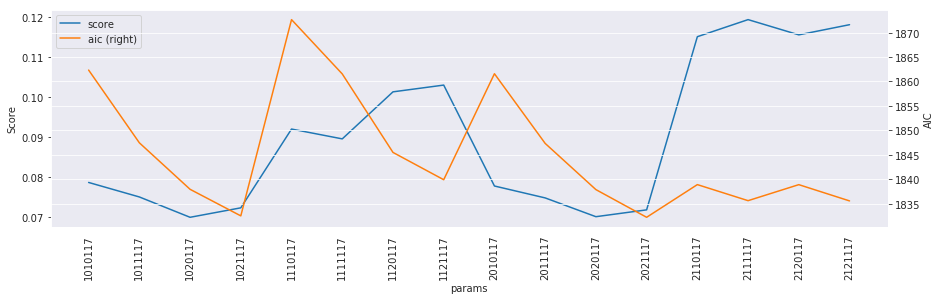

In [23]:
resbrute, gr = autoSARIMAX(endog=air.visit_mean, exog=None, date_train_end="2017-03-26", pred_days = [-28,39],\
                             ranges=(slice(1,3),slice(0,2),slice(1,3),  slice(0,2),slice(1,2),slice(1,2),slice(7,8)))

The autoSARIMAX function evaluates models based on the mean squared log error and the AIC (estimates the quality of the statistical model) is plotted.

The model we obtain is **(1,0,2)x(1,1,1,7)**, which is simpler and has relative good test results (parsimony principle). 

Running SARIMAX **(1,0,2)x(1,1,1,7)**: weekly oscillatiosn are captured, but the ACF plots show some pattern in the residuals (not white noise as we want). 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                        visit_mean   No. Observations:                  450
Model:             SARIMAX(1, 0, 2)x(1, 1, 1, 7)   Log Likelihood                -907.244
Date:                           Mon, 03 Dec 2018   AIC                           1828.488
Time:                                   23:14:13   BIC                           1857.143
Sample:                               01-01-2016   HQIC                          1839.789
                                    - 03-25-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0004      0.001     -0.351      0.725      -0.003       0.002
ar.L1          0.9450      0.030     31.400

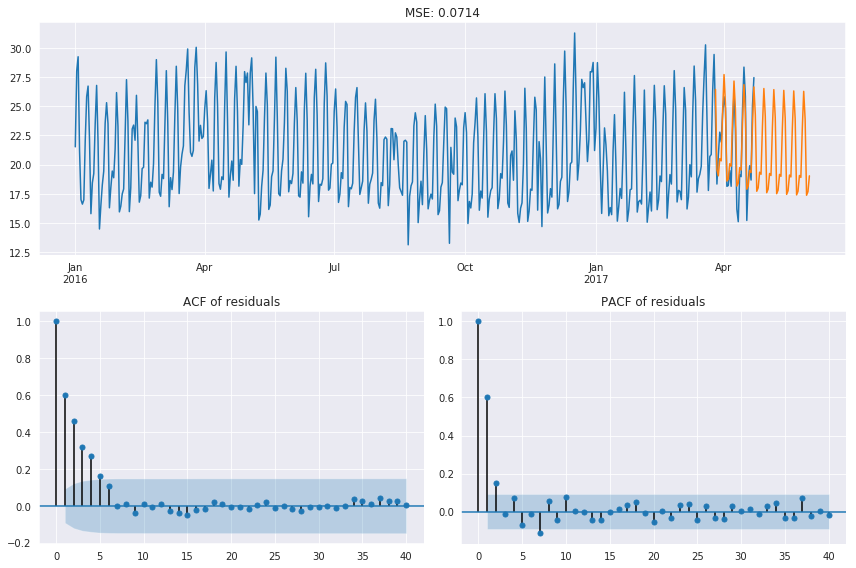

In [24]:
mod = sm.tsa.statespace.SARIMAX(air.visit_mean[:450], trend='c', order=(1,0,2), seasonal_order=(1,1,1,7))
results = mod.fit()
#Predict on future data and on time periods already known for evaluation with RMSLE
pred = results.predict(start=450, end=516)
print(results.summary())
#Plot
plotSARIMAX(air.visit_mean, pred)

### SARIMAX with eXogenous dataset

The holidays column can be assed to the X of SARIMAX as eXogenous regressors.


/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequ

Best parameters: [1, 0, 2, 0, 1, 1, 7]
Best score:          0.07667686387876613
All parameters and scores: 

     params     score          aic
0   1010117  0.084486  1790.928274
1   1011117  0.079281  1766.628770
2   1020117  0.076677  1762.461470
3   1021117  0.079957  1749.149629
4   1110117  0.094405  1784.025703
5   1111117  0.096093  1767.453814
6   1120117  0.099742  1767.083583
7   1121117  0.103071  1754.677929
8   2010117  0.083639  1790.370541
9   2011117  0.079153  1766.509513
10  2020117  0.078676  1761.620956
11  2021117  0.085681  1752.701853
12  2110117  0.108771  1757.585210
13  2111117  0.113439  1749.055338
14  2120117  0.119844  1749.927594
15  2121117  0.122115  1746.319046


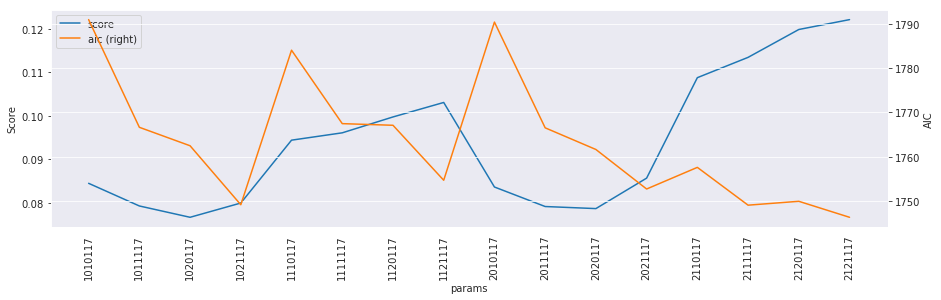

In [25]:
resbrute, gr = autoSARIMAX(endog=air.visit_mean, exog=hol, date_train_end="2017-03-26", pred_days=[-28,39],\
                    ranges=(slice(1,3),slice(0,2),slice(1,3),  slice(0,2),slice(1,2),slice(1,2),slice(7,8)))

From the plot of auto-SARIMAX above, the (1, 0, 2)x(1, 2, 1, 7) model used so far shows a dip and only more complex models get lower scores. 
The plot below shows that adding the day of the week column as exogenous regressors does not change the error and quality of the fit so much. Autorrelation of residuals has not improved and shows some structure.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                
Dep. Variable:                        visit_mean   No. Observations:                  450
Model:             SARIMAX(1, 0, 2)x(1, 1, 1, 7)   Log Likelihood                -864.575
Date:                           Mon, 03 Dec 2018   AIC                           1747.150
Time:                                   23:15:01   BIC                           1783.992
Sample:                               01-01-2016   HQIC                          1761.680
                                    - 03-25-2017                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.753e-05      0.001      0.024      0.981      -0.001       0.001
day_of_week     0.1001   3.03e-06    3.3

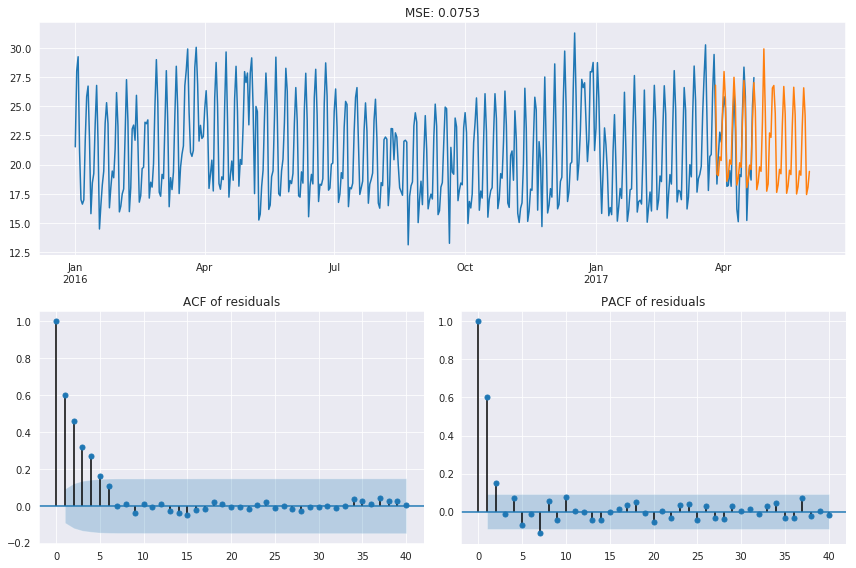

In [26]:
modx2 = sm.tsa.statespace.SARIMAX(air.visit_mean[:450], trend='c', exog=hol[:450], order=(1,0,2), seasonal_order=(1,1,1,7))
resultsx2 = modx2.fit(start_params=0.1*np.ones( len(modx2.params_complete)))
#Predict on future data and on time periods already known for evaluation with RMSLE
predx2 = resultsx2.predict(start=450, end=516, exog=hol[450:])
print(resultsx2.summary())
plotSARIMAX(air.visit_mean, predx2)